In [2]:
import sys, os
sys.path.insert(0,os.path.abspath('..'))
from scripts.project_functions import *
sns.set_theme(style="whitegrid")

In [3]:
df = load_and_process(r"..\..\data\raw\database.csv")
df

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,City,State,Year,Month,Incident,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Alaska,1980,January,1,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Alaska,1980,March,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0,FBI
2,Anchorage,Alaska,1980,April,1,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0,FBI
3,Anchorage,Alaska,1980,May,1,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,0,0,FBI
4,Anchorage,Alaska,1980,May,2,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325231,Natrona,Wyoming,2014,August,1,Yes,Male,29,Native American/Alaska Native,Male,67,Black,Friend,Firearm,0,0,FBI
325232,Sheridan,Wyoming,2014,June,1,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun,0,0,FBI
325233,Sheridan,Wyoming,2014,September,1,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0,0,FBI
325234,Sublette,Wyoming,2014,December,1,Yes,Male,55,White,Male,31,White,Stranger,Knife,0,1,FBI


In [4]:
df.describe(include=[object]).T

,count,unique,top,freq
City,325236,1758,Los Angeles,18161
State,325236,51,California,45537
Month,325236,12,July,29833
Crime Solved,325236,2,Yes,325234
Victim Sex,325236,2,Male,237760
Victim Race,325236,4,White,176824
Perpetrator Sex,325236,2,Male,285625
Perpetrator Age,325236,187,20,14871
Perpetrator Race,325236,4,White,167018
Relationship,325236,27,Acquaintance,116439


## EDA
For this EDA I will be checking the weapon used with relation to the sex of the perpetrator to see if there are any interesting correlations.

In [5]:
df2 = df[['Perpetrator Sex','Weapon']]
df2

,Perpetrator Sex,Weapon
0,Male,Blunt Object
1,Male,Strangulation
2,Male,Strangulation
3,Male,Rifle
4,Male,Knife
...,...,...
325231,Male,Firearm
325232,Male,Handgun
325233,Female,Suffocation
325234,Male,Knife


<AxesSubplot:xlabel='count', ylabel='Weapon'>

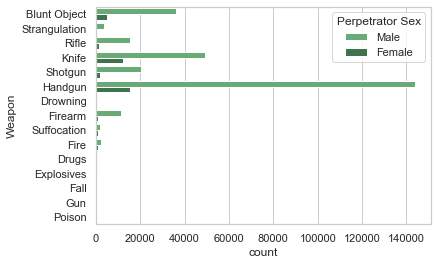

In [11]:
sns.countplot(data=df2, y='Weapon', hue = 'Perpetrator Sex',palette="Greens_d")

<AxesSubplot:xlabel='Weapon', ylabel='Weapon'>

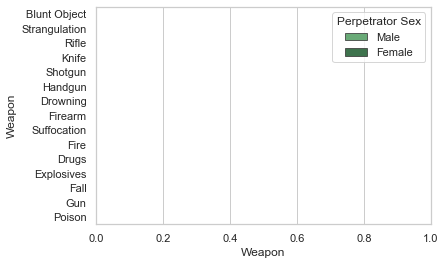

In [12]:
sns.boxplot(data=df2, y='Weapon',x=df.Weapon.value_counts() ,hue = 'Perpetrator Sex',palette="Greens_d")